In [1]:
%pip install sinling nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Read the Sinhala and English files separately
with open('dataset/sinhala.txt', 'r', encoding='utf-8') as sin_file:
    sinhala_sentences = sin_file.readlines()

with open('dataset/english.txt', 'r', encoding='utf-8') as eng_file:
    english_sentences = eng_file.readlines()

# Check if the files have the same number of sentences
if len(sinhala_sentences) != len(english_sentences):
    raise ValueError("The number of sentences in the two files is not the same.")

In [3]:
import nltk
import string
from sinling import SinhalaTokenizer

# Download the NLTK tokenizer
nltk.download('punkt')

# Preprocessing function for english sentences
def preprocess_en(sentence):
    tokens = nltk.word_tokenize(sentence)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in string.punctuation]
    return tokens

# Preprocessing function for sinhala sentences using singlin library
def preprocess_si(sentence):
    tokenizer = SinhalaTokenizer()
    tokens = tokenizer.tokenize(sentence)
    tokens = [word for word in tokens if word not in string.punctuation]
    return tokens

# Preprocess Sinhala sentences
sinhala_tokens = [preprocess_si(sentence.strip()) for sentence in sinhala_sentences]

# Preprocess English sentences
english_tokens = [preprocess_en(sentence.strip()) for sentence in english_sentences]

# Display some preprocessed sentences for both languages
print("Sinhala tokens example:", sinhala_tokens[:5])
print("English tokens example:", english_tokens[:5])


[nltk_data] Downloading package punkt to /home/madusha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sinhala tokens example: [['තරගමාලාව', 'පාකිස්තානය', 'ජය', 'ගත්තේය'], ['තරගාවලිය', 'අවසන්', 'වීමෙන්', 'පසු', 'පකිස්තාන', 'නායක', 'සර්ෆ්\u200dරාස්', 'අහමඩ්', 'ප්\u200dරකාශ', 'කළේ', 'ඉදිරියේදී', 'කිසිදු', 'කණ්ඩායමක්', 'ආරක්ෂාව', 'පිළිබඳ', 'කරුණු', 'නිදහසට', 'කරුණක්', 'ලෙස', 'භාවිත', 'නොකරන', 'බවයි.'], ['මේ', 'වසරේ', 'හෝ', 'ලබන', 'වසරේ', 'ජාත්\u200dයන්තර', 'ක්\u200dරිකට්', 'නැවත', 'පාකිස්තානයට', 'පැමිණෙනු', 'ඇත'], ['ශ්\u200dරී', 'ලංකා', 'ක්\u200dරිකට්', 'කණ්ඩායමට', 'එල්ල', 'වූ', 'ප්\u200dරහාරයකින්', 'පසුව', 'එම', 'තරගාවලිය', 'කෙටි', 'විය'], ['බටහිර', 'ඉන්දීය', 'කොදෙව්', 'පිලේ', 'නායකයා', 'ලෙස', 'ජේසන්', 'මොහොමඩ්', 'නම්', 'කෙරුණු', 'අතර', 'නිත්\u200dය', 'විස්සයි20', 'නායකයා', 'ලෙස', 'කාලෝස්', 'බ්\u200dරැත්වේට්', 'ආරක්ෂක', 'හේතුන්', 'මත', 'සංචාරය', 'නොකළේය']]
English tokens example: [['pakistan', 'won', 'the', 'series'], ['following', 'the', 'conclusion', 'of', 'the', 'series', 'pakistans', 'captain', 'sarfraz', 'ahmed', 'said', 'that', 'no', 'team', 'will', 'be', 'using', 'security', 'conce

In [4]:
from collections import Counter

# Flatten the list of tokens to calculate word frequency
sinhala_words = [word for sentence in sinhala_tokens for word in sentence]
english_words = [word for sentence in english_tokens for word in sentence]

# Count word frequencies
sinhala_freq = Counter(sinhala_words)
english_freq = Counter(english_words)

# Display the top 10 most frequent words for each corpus
print("Top 10 Sinhala words:", sinhala_freq.most_common(10))
print("Top 10 English words:", english_freq.most_common(10))


Top 10 Sinhala words: [('සහ', 47), ('සඳහා', 20), ('ලෙස', 17), ('වන', 17), ('හෝ', 16), ('අතර', 16), ('වේ', 15), ('මෙම', 15), ('කිරීම', 14), ('ඇති', 14)]
Top 10 English words: [('the', 160), ('of', 72), ('and', 66), ('in', 54), ('to', 52), ('a', 41), ('for', 20), ('is', 19), ('on', 18), ('as', 17)]


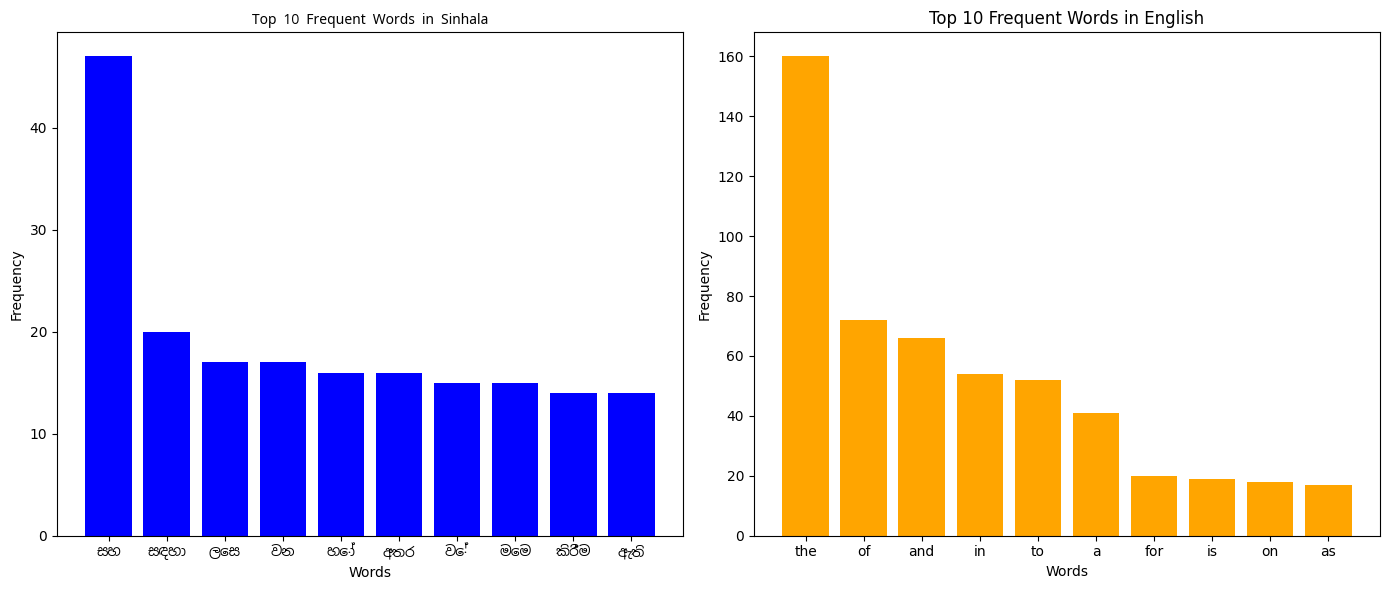

Sinhala words: [('සහ', 47), ('සඳහා', 20), ('ලෙස', 17), ('වන', 17), ('හෝ', 16), ('අතර', 16), ('වේ', 15), ('මෙම', 15), ('කිරීම', 14), ('ඇති', 14)]
English words: [('the', 160), ('of', 72), ('and', 66), ('in', 54), ('to', 52), ('a', 41), ('for', 20), ('is', 19), ('on', 18), ('as', 17)]


In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# added NotoSansSinhla For the sinhala preview
sinhala_font_path = "NotoSansSinhala.ttf"
sinhala_font = fm.FontProperties(fname=sinhala_font_path)

# Get the top 10 most frequent words from Sinhala and English corpora
sinhala_top_10 = sinhala_freq.most_common(10)
english_top_10 = english_freq.most_common(10)

# Separate words and frequencies for plotting
sinhala_words, sinhala_counts = zip(*sinhala_top_10)
english_words, english_counts = zip(*english_top_10)

# Create subplots for the two languages
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Sinhala word frequencies
ax[0].bar(sinhala_words, sinhala_counts, color='blue')
ax[0].set_title('Top 10 Frequent Words in Sinhala', fontproperties=sinhala_font)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Words')
# Apply the Sinhala font to x-axis labels
ax[0].tick_params(axis='x', labelsize=10)
for label in ax[0].get_xticklabels():
    label.set_fontproperties(sinhala_font)

# Plot English word frequencies
ax[1].bar(english_words, english_counts, color='orange')
ax[1].set_title('Top 10 Frequent Words in English')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Words')

# Show the plots
plt.tight_layout()
plt.show()

# Preview the text as well
print("Sinhala words:", sinhala_top_10)
print("English words:", english_top_10)

In [6]:
# Sort words by frequency in descending order
sinhala_sorted = sorted(sinhala_freq.items(), key=lambda x: x[1], reverse=True)
english_sorted = sorted(english_freq.items(), key=lambda x: x[1], reverse=True)

# Assign ranks to each word in both languages
sinhala_ranked = [(word, freq, rank + 1) for rank, (word, freq) in enumerate(sinhala_sorted)]
english_ranked = [(word, freq, rank + 1) for rank, (word, freq) in enumerate(english_sorted)]

# Display the top 10 ranked words for each corpus
print("Top 10 ranked Sinhala words:", sinhala_ranked[:10])
print("Top 10 ranked English words:", english_ranked[:10])


Top 10 ranked Sinhala words: [('සහ', 47, 1), ('සඳහා', 20, 2), ('ලෙස', 17, 3), ('වන', 17, 4), ('හෝ', 16, 5), ('අතර', 16, 6), ('වේ', 15, 7), ('මෙම', 15, 8), ('කිරීම', 14, 9), ('ඇති', 14, 10)]
Top 10 ranked English words: [('the', 160, 1), ('of', 72, 2), ('and', 66, 3), ('in', 54, 4), ('to', 52, 5), ('a', 41, 6), ('for', 20, 7), ('is', 19, 8), ('on', 18, 9), ('as', 17, 10)]


In [7]:
# Calculate f * r for the top 25 words
sinhala_zipf = [(word, freq * rank) for word, freq, rank in sinhala_ranked[:25]]
english_zipf = [(word, freq * rank) for word, freq, rank in english_ranked[:25]]

# Display the Zipf results
print("Sinhala Zipf's Law results (f * r):", sinhala_zipf)
print("English Zipf's Law results (f * r):", english_zipf)


Sinhala Zipf's Law results (f * r): [('සහ', 47), ('සඳහා', 40), ('ලෙස', 51), ('වන', 68), ('හෝ', 80), ('අතර', 96), ('වේ', 105), ('මෙම', 120), ('කිරීම', 126), ('ඇති', 140), ('විද්\u200dයාව', 154), ('වූ', 156), ('කරන', 169), ('කිරීමට', 168), ('එය', 180), ('විය', 176), ('භාවිතා', 187), ('ඇත', 180), ('දළදා', 190), ('ඇතුළත්', 200), ('වහන්සේ', 189), ('හැකිය', 198), ('කළ', 207), ('කරයි', 216), ('ශ්\u200dරී', 200)]
English Zipf's Law results (f * r): [('the', 160), ('of', 144), ('and', 198), ('in', 216), ('to', 260), ('a', 246), ('for', 140), ('is', 152), ('on', 162), ('as', 170), ('or', 187), ('by', 192), ('it', 182), ('that', 182), ('be', 195), ('was', 208), ('are', 221), ('can', 180), ('other', 190), ('factors', 200), ('an', 189), ('this', 198), ('has', 207), ('tooth', 216), ('from', 225)]


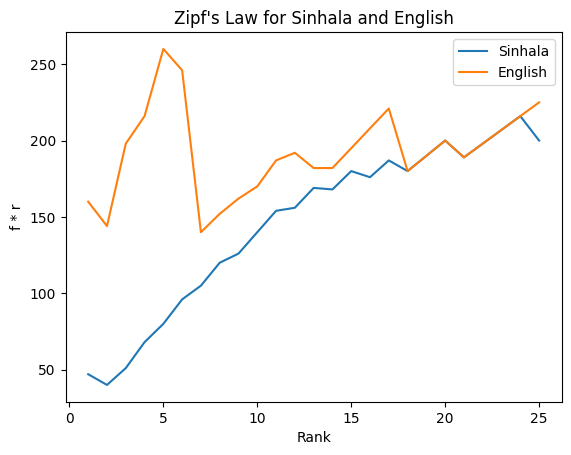

In [8]:
import matplotlib.pyplot as plt

# Extract the f * r values for plotting
sinhala_fr = [freq * rank for _, freq, rank in sinhala_ranked[:25]]
english_fr = [freq * rank for _, freq, rank in english_ranked[:25]]

# Plot the Zipf's Law results
plt.plot(range(1, 26), sinhala_fr, label='Sinhala')
plt.plot(range(1, 26), english_fr, label='English')
plt.xlabel('Rank')
plt.ylabel('f * r')
plt.title("Zipf's Law for Sinhala and English")
plt.legend()
plt.show()
